# Market Basket Analysis<a id="Top"></a>

## Table of Contents

1. [Load Needed Packages](#1)<br>
2. [Get Data](#2)<br>
    2.1 [Read in the Data from csv](#2.1)<br>
    2.2 [Clean Data](#2.2)<br>
3. [Visualize Data](#3)<br>
4. [Basket Analysis](#4)<br>

---
# 1. Load Needed Packages<a id=1></a>

In [1]:
# !pip install mlxtend -U

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

##### [Back to Top](#Top)

---
## 2. Get Data<a id=2></a>

### 2.1 Read in the Data from csv<a id=2.1></a>
Data source: https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery

In [3]:
df = pd.read_csv("data/transactions_from_a_bakery.csv")
print('There are ' +str(len(df)) + ' observations')

There are 21293 observations


In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


### 2.2 Clean Data<a id=2.2></a>

In [5]:
# Check the structure or type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
# Unique items in the 'Item' column
np.sort(df['Item'].unique())

array(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread',
       'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake',
       'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew',
       'Chicken sand', 'Chimichurri Oil', 'Chocolates',
       'Christmas common', 'Coffee', 'Coffee granules ', 'Coke',
       'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ',
       'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches",
       'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House',
       'Focaccia', 'Frittata', 'Fudge', 'Gift voucher',
       'Gingerbread syrup', 'Granola', 'Hack the stack',
       'Half slice Monster ', 'Hearty & Seasonal', 'Honey',
       'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice',
       'Keeping It Local', 'Kids biscuit', 'Lemon and coconut',
       'Medialuna', 'Mighty Protein', 'Mineral wat

In [7]:
# Capitalize the first letter of every word
df['Item'] = df['Item'].str.title()

# Remove rows with Adjustment and NONE items
df = df[~(df['Item'] == 'Adjustment') | (df['Item'] == 'NONE')]

# Display updated dataframe
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot Chocolate
4,2016-10-30,10:07:57,3,Jam


##### [Back to Top](#Top)

---
# 3. Visualize Data<a id=3></a>

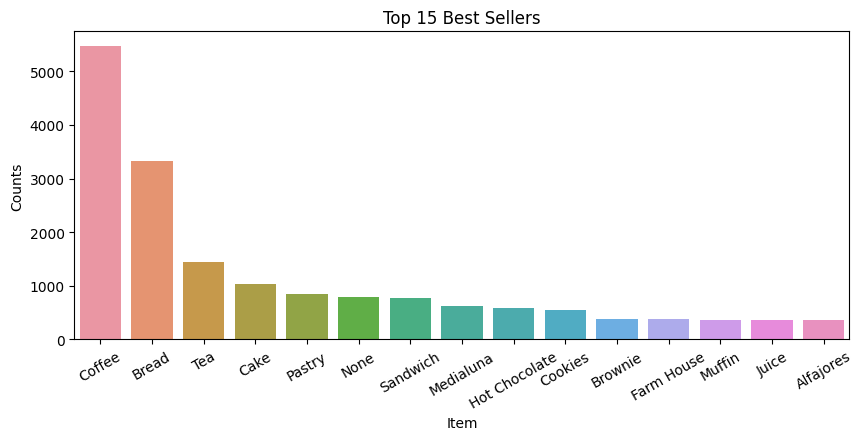

In [8]:
# Count item sales and get the top 15
item_counts = df['Item'].value_counts().sort_values(ascending=False)[:15]

# Create bar chart
plt.figure(figsize=(10,4))
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.title('Top 15 Best Sellers')
plt.xlabel('Item')
plt.ylabel('Counts')
plt.xticks(rotation=30)
plt.show()

##### [Back to Top](#Top)

---
## 4. Basket Analysis<a id=4></a>

In [9]:
# List all items in the column, write an order transaction per row
# Return 1 if the item was bought; otherwise, return 0
basket_df = (df
             .groupby(['Transaction','Item'])['Transaction']
             .nunique().unstack().reset_index().fillna(0)
             .set_index('Transaction'))

# Display updated dataframe
basket_df.head(2)

Item,Afternoon With The Baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,...,The Bart,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine'S Card,Vegan Feast,Vegan Mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Get frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_df.astype('bool'), min_support=0.03, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Cake),0.475131,0.103148,0.054355,0.114399,1.109080,0.005346,1.012705
1,(Cake),(Coffee),0.103148,0.475131,0.054355,0.526958,1.109080,0.005346,1.109561
2,(Medialuna),(Coffee),0.061385,0.475131,0.034942,0.569231,1.198050,0.005776,1.218446
3,(Coffee),(Medialuna),0.475131,0.061385,0.034942,0.073542,1.198050,0.005776,1.013122
4,(None),(Coffee),0.079014,0.475131,0.042078,0.532537,1.120820,0.004536,1.122802
5,(Coffee),(None),0.475131,0.079014,0.042078,0.088560,1.120820,0.004536,1.010474
6,(Coffee),(Pastry),0.475131,0.085519,0.047219,0.099382,1.162094,0.006586,1.015392
7,(Pastry),(Coffee),0.085519,0.475131,0.047219,0.552147,1.162094,0.006586,1.171967
8,(Sandwich),(Coffee),0.071354,0.475131,0.037985,0.532353,1.120434,0.004083,1.122361
9,(Coffee),(Sandwich),0.475131,0.071354,0.037985,0.079947,1.120434,0.004083,1.009340


In [11]:
# Print the top 5 rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(5)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Medialuna),(Coffee),0.061385,0.475131,0.034942,0.569231,1.198050,0.005776,1.218446
3,(Coffee),(Medialuna),0.475131,0.061385,0.034942,0.073542,1.198050,0.005776,1.013122
6,(Coffee),(Pastry),0.475131,0.085519,0.047219,0.099382,1.162094,0.006586,1.015392
7,(Pastry),(Coffee),0.085519,0.475131,0.047219,0.552147,1.162094,0.006586,1.171967
4,(None),(Coffee),0.079014,0.475131,0.042078,0.532537,1.120820,0.004536,1.122802


**Support**
- Antecedent/Consequent Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item A: Support(A) = Transactions Containing A / Total Transactions
- Support measures the proportion of transactions that contain both items in a rule. A high support value indicates that the items in the rule are frequently purchased together.


**Confidence**
- Confidence refers to the likelihood that an Consequent item is also bought if Antecedent item is bought. It can be calculated by finding the number of transactions where Antecedent and Consequent are bought together, divided by total number of transactions where Antecedent is bought.
- Confidence (Antecedent -> Consequent) = Transactions Containing both Antecedent and Consequent / Transactions Containing Antecedent
- A high confidence value indicates that when the Antecedent item(s) are purchased, the likelihood of also purchasing the Consequent item(s) is high.

**Lift**
- Lift measures the degree of association between the Antecedent and Consequent items, relative to what would be expected if the items were purchased independently. In other words, Lift (Antecedent -> Consequent) refers to the increase in the ratio of sale of Consequent item(s) when Antecedent item(s) is sold.
- Lift (Antecedent -> Consequent) = Confidence (Antecedent -> Consequent) / Support (Consequent)
- The likelihood of buying Antecedent item(s) and Consequent item(s) together is Lift (Antecedent -> Consequent) times more than the likelihood of just buying Consequent item(s).
- A Lift of 1 means there is no association between Antecedent and Consequent items. Lift of greater than 1 means products Antecedent item(s) and Consequent item(s) are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

##### [Back to Top](#Top)